In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
titanic = pd.read_csv("inputData/titanic.csv")

In [132]:
titanic.head(50)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [6]:
tantinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [13]:
tantinic.describe(include=np.object)

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [21]:
plsrst = tantinic[["pclass","survived"]].groupby("pclass",as_index=False).mean()

In [53]:
x = plsrst.pclass
y = plsrst.survived

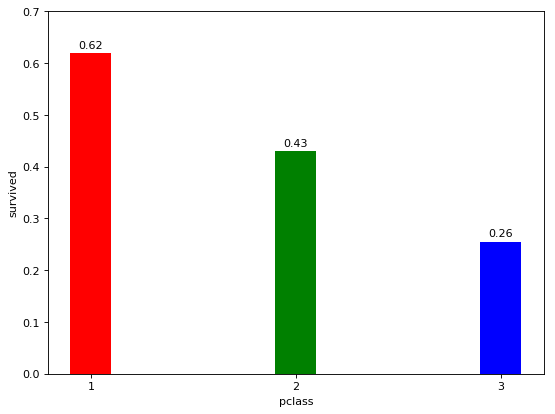

In [85]:
fig,ax = plt.subplots(figsize=(8,6),dpi=80)
ax.bar(np.arange(len(x)),y,tick_label=x,color=["r","g","b"],width=0.2,label=[1,2,3])
ax.set_ylim(0,0.7)
ax.set_xlabel("pclass")
ax.set_ylabel("survived")
for a,b in zip(np.arange(len(x)),y):
    ax.text(a,b+0.01,round(b,2),ha="center")
fig.savefig("1.png")

In [89]:
sexrst = tantinic[["sex","survived"]].groupby("sex",as_index=False).mean()

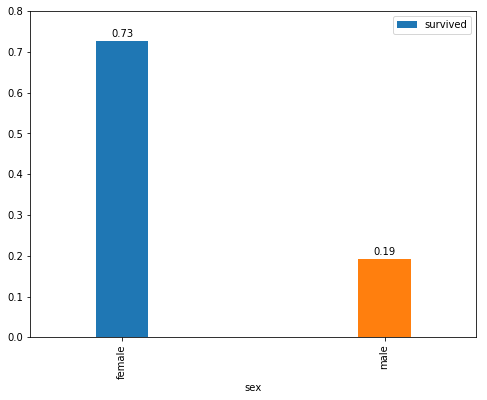

In [98]:
ax = sexrst.plot(x="sex",y="survived",kind="bar",width=0.2,figsize=(8,6))
x = sexrst.sex
y = sexrst.survived
ax.set_ylim(0,0.8)
for a,b in zip(np.arange(len(x)),y):
    ax.text(a,b+0.01,round(b,2),ha="center")
fig = ax.get_figure()
fig.savefig("2.png")

In [100]:
import seaborn as sns

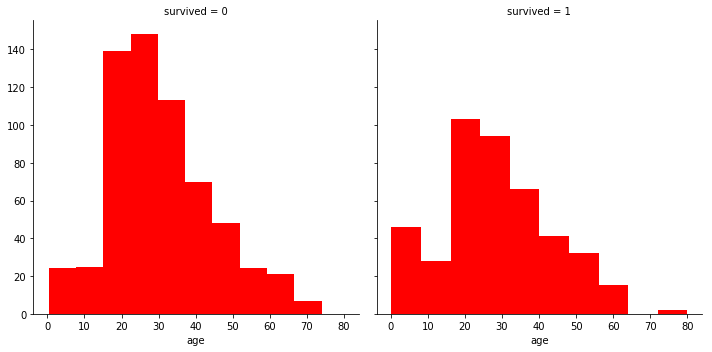

In [116]:
g = sns.FacetGrid(tantinic,col="survived",size=5)
a = g.map(plt.hist,"age",color="r")

In [117]:
a.savefig("3.png")

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


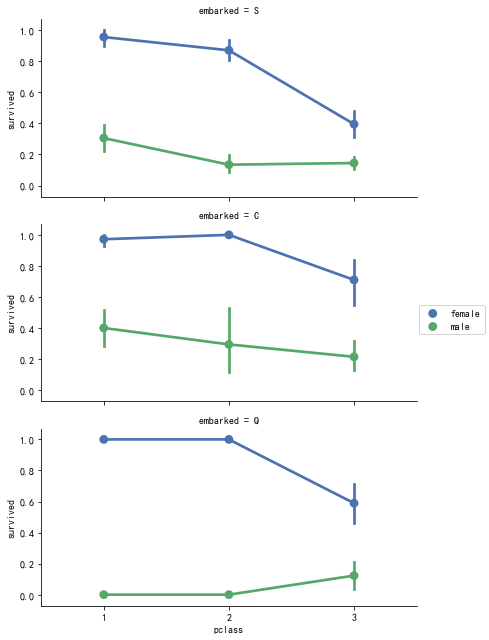

In [236]:
plt.rcParams['font.sans-serif']=['SimHei']
grid = sns.FacetGrid(tantinic,row="embarked",size=3,aspect=2)
b = grid.map(sns.pointplot,"pclass","survived","sex",palette="deep",hue_order=["female","male"])
grid.add_legend()

In [237]:
b.savefig("4.png")

In [136]:
tantinic[["pclass","survived","sex"]].groupby(["pclass","survived"]).count().unstack()

sex     
survived    0    1
pclass            
1         123  200
2         158  119
3         528  181

In [139]:
pd.DataFrame

ValueError: DataFrame constructor not properly called!

In [143]:
dt = {'类别':["F1","F0","S1","S0","T1","T0"], '数量':[200,123,119,158,181,528]}
f = pd.DataFrame(dt) #3、从列表类型的字典创建
f

,类别,数量
0,F1,200
1,F0,123
2,S1,119
3,S0,158
4,T1,181
5,T0,528


In [145]:
f.数量

0    200
1    123
2    119
3    158
4    181
5    528
Name: 数量, dtype: int64

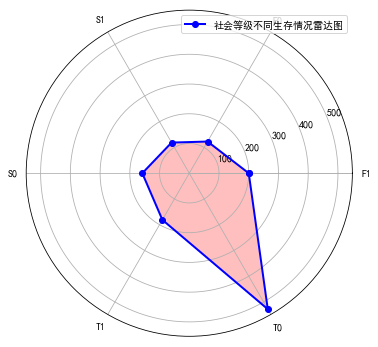

In [150]:
plt.rcParams['font.sans-serif']=['SimHei']
#=======自己设置开始============
#标签
labels = f.类别
#数据个数
dataLenth = 6
#数据
data = f.数量


data1 = np.concatenate((data, [data[0]]))
#data2 = np.concatenate((data2, [data2[0]]))
#========自己设置结束============

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]])) # 闭合

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, polar=True)# polar参数！！
ax.plot(angles, data1, 'bo-', linewidth=2,label="社会等级不同生存情况雷达图")# 画线
ax.fill(angles, data1, facecolor='r', alpha=0.25)# 填充
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
plt.legend(loc="upper right")
ax.grid(True)
plt.savefig("5.png")

In [152]:
a = tantinic["home.dest"]

In [155]:
city  = a.dropna()

In [177]:
def getcity(x):
    try:
        city = x.split(",")[1]
        if(len(city)==3):
            return city
    except:
        return None

In [178]:
rst = pd.value_counts(city.apply(getcity))

In [180]:
rst 

 NY    127
 NJ     29
 MA     27
 PA     26
 PQ     18
 OH     17
 IL     17
 MN     17
 ON     16
 CA     12
 MI     10
 CT      9
 MB      9
 WI      7
 RI      5
 DC      5
 OR      5
 WA      4
 IA      4
 MO      4
 BC      4
 ME      3
 SD      3
 IN      3
 ND      3
 VT      3
 MT      3
 CO      3
 KY      2
 AB      2
 WV      2
 NS      2
 NI      1
 UT      1
 NH      1
 VA      1
 FL      1
 NE      1
 DE      1
 SK      1
Name: home.dest, dtype: int64

In [171]:
rst.to_csv("1.csv")

In [181]:
import requests
rs = requests.get("http://114.xixik.com/usa-stats/")

In [186]:
from bs4 import BeautifulSoup
rs.encoding = rs.apparent_encoding
soup = BeautifulSoup(rs.text,"html.parser")

In [199]:
lst = []
for i in soup.find_all("tbody")[0].find_all("tr")[1:]:
    lst.append(i.find_all("td")[3].text.replace("\t","").replace("\n",""))

In [201]:
for i in range(len(lst)):
    lst[i] = lst[i].replace("\r","")

In [202]:
lst

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [206]:
df = rst.to_frame()

In [208]:
df["city"] = df.index

In [215]:
def filterUSA(x):
    if(x.strip() in lst):
        return x.strip()
    else:
        return 9999

In [216]:
df["city"] = df["city"].apply(filterUSA)

In [220]:
df = df.loc[df["city"]!=9999]

In [223]:
df1 = df.drop("city",axis=1)

In [224]:
df1.to_csv("3.csv")

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("cnki.csv",encoding="utf-8-sig")

In [6]:
df.head()

,theme,author,journal,datatime,cites,downloads
0,贪污受贿犯罪定罪量刑标准问题研究,赵秉志,中国法学,2015-02-09,212,41760
1,互联网金融的法律规制——基于信息工具的视角,杨东,中国社会科学,2015-04-10,240,17387
2,中国对外直接投资区位选择的决定因素:制度、税负和资源禀赋,王永钦,经济研究,2014-12-20,215,12030
3,中国制造业企业全要素生产率研究,杨汝岱,经济研究,2015-02-20,362,22178
4,技术创新、技术引进与经济增长方式转变,唐未兵,经济研究,2014-07-20,356,30509


In [7]:
df.to_csv("cnki2.csv",encoding="utf-8")

In [8]:
df.to_csv("cnki2.csv",encoding="utf-8",index=False)